In [4]:
import statsmodels.api as sm

stock = 'AAPL'  # Change to any stock in your dataset
y = excess_returns[stock].dropna()
X = excess_returns['Market_Portfolio'].loc[y.index]
X = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     273.5
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           5.57e-30
Time:                        01:36:57   Log-Likelihood:                 287.00
No. Observations:                  99   AIC:                            -570.0
Df Residuals:                      97   BIC:                            -564.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0024      0.001  

STATISTICAL SUMMARY FOR ALL STOCKS

Mean (Daily Returns):
AAPL    -0.00055
MSFT     0.00339
GOOGL    0.00167
TSLA     0.00387
AMZN     0.00122
dtype: float64

Standard Deviation (Daily Returns):
AAPL     0.02618
MSFT     0.01787
GOOGL    0.02173
TSLA     0.04804
AMZN     0.02591
dtype: float64

Variance (Daily Returns):
AAPL     0.00069
MSFT     0.00032
GOOGL    0.00047
TSLA     0.00231
AMZN     0.00067
dtype: float64

Covariance Matrix:
          AAPL     MSFT    GOOGL     TSLA     AMZN
AAPL   0.00069  0.00031  0.00035  0.00081  0.00051
MSFT   0.00031  0.00032  0.00025  0.00047  0.00035
GOOGL  0.00035  0.00025  0.00047  0.00061  0.00040
TSLA   0.00081  0.00047  0.00061  0.00231  0.00075
AMZN   0.00051  0.00035  0.00040  0.00075  0.00067

Correlation Matrix:
        AAPL   MSFT  GOOGL   TSLA   AMZN
AAPL   1.000  0.672  0.620  0.642  0.748
MSFT   0.672  1.000  0.632  0.549  0.757
GOOGL  0.620  0.632  1.000  0.587  0.706
TSLA   0.642  0.549  0.587  1.000  0.600
AMZN   0.748  0.757  0.706

STATISTICAL SUMMARY FOR ALL STOCKS

Mean (Daily Returns):
AAPL    -0.00055
MSFT     0.00339
GOOGL    0.00167
TSLA     0.00387
AMZN     0.00122
dtype: float64

Standard Deviation (Daily Returns):
AAPL     0.02618
MSFT     0.01787
GOOGL    0.02173
TSLA     0.04804
AMZN     0.02591
dtype: float64

Variance (Daily Returns):
AAPL     0.00069
MSFT     0.00032
GOOGL    0.00047
TSLA     0.00231
AMZN     0.00067
dtype: float64

Covariance Matrix:
          AAPL     MSFT    GOOGL     TSLA     AMZN
AAPL   0.00069  0.00031  0.00035  0.00081  0.00051
MSFT   0.00031  0.00032  0.00025  0.00047  0.00035
GOOGL  0.00035  0.00025  0.00047  0.00061  0.00040
TSLA   0.00081  0.00047  0.00061  0.00231  0.00075
AMZN   0.00051  0.00035  0.00040  0.00075  0.00067

Correlation Matrix:
        AAPL   MSFT  GOOGL   TSLA   AMZN
AAPL   1.000  0.672  0.620  0.642  0.748
MSFT   0.672  1.000  0.632  0.549  0.757
GOOGL  0.620  0.632  1.000  0.587  0.706
TSLA   0.642  0.549  0.587  1.000  0.600
AMZN   0.748  0.757  0.706

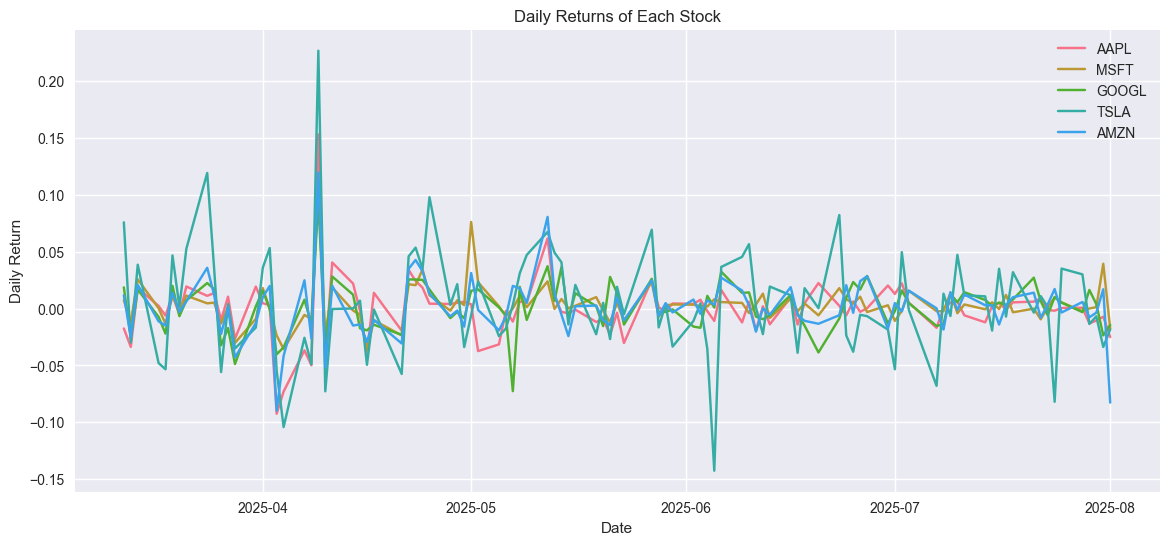

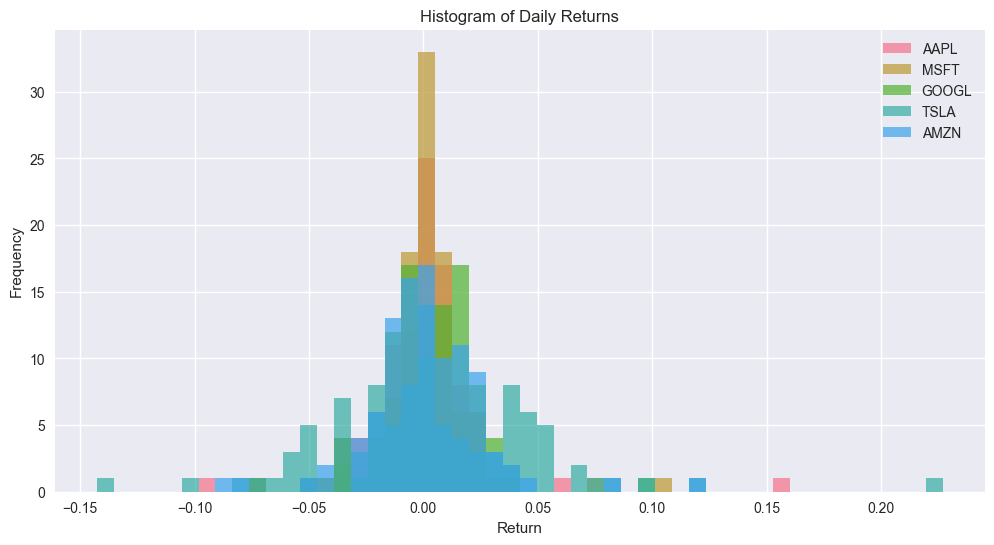

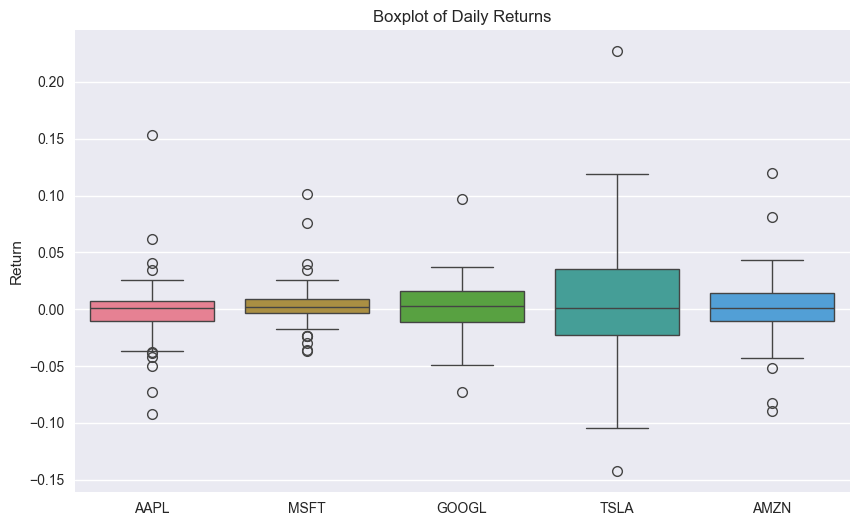

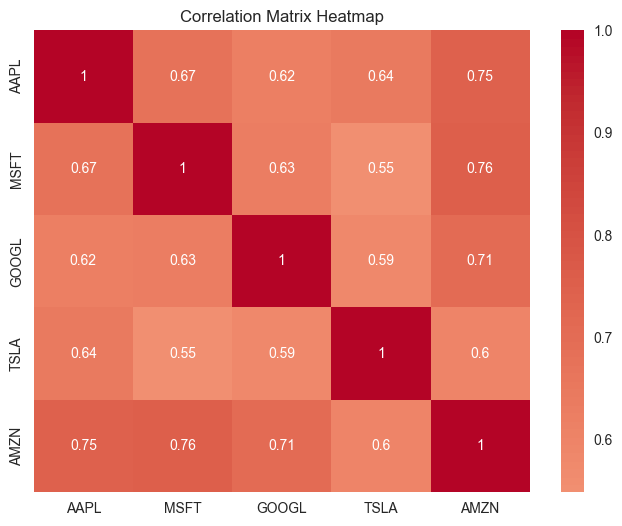

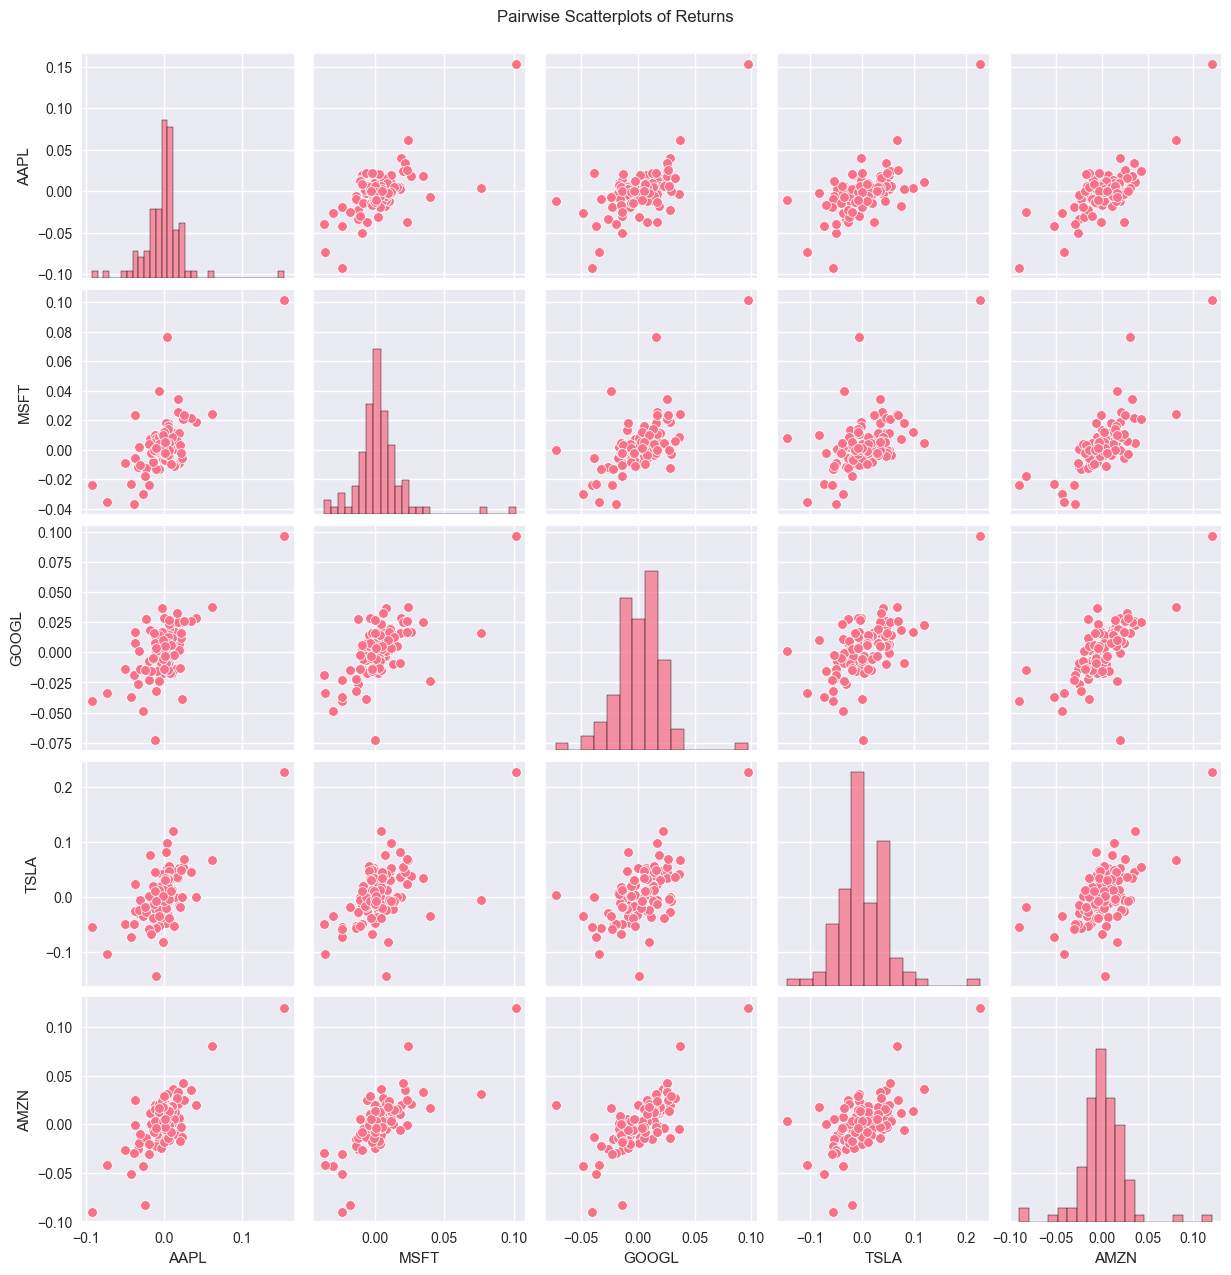

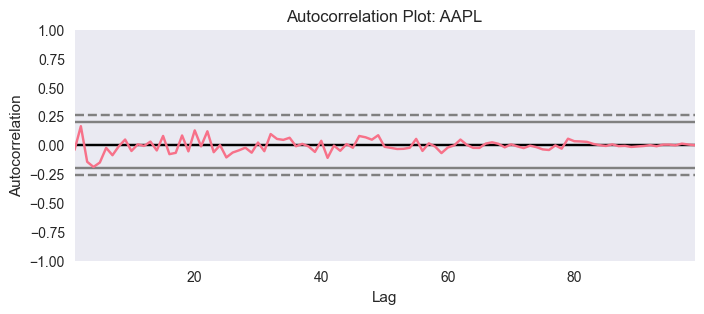

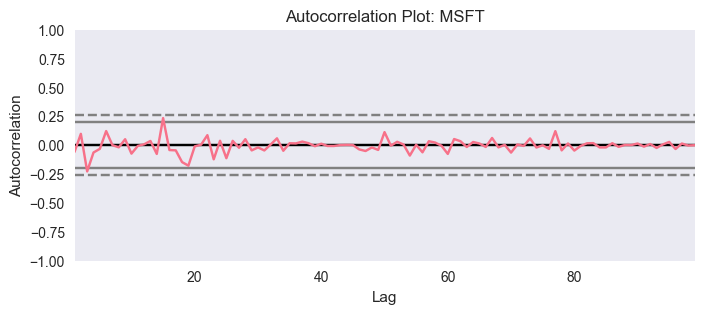

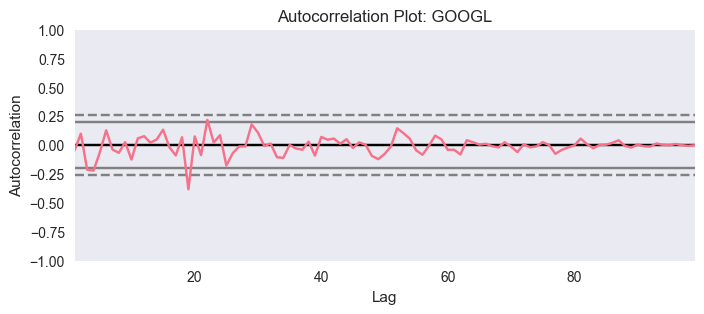

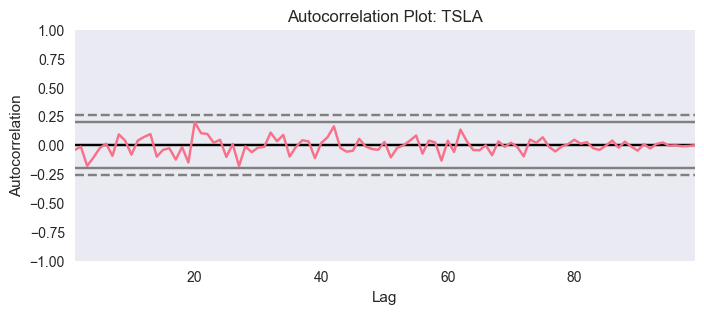

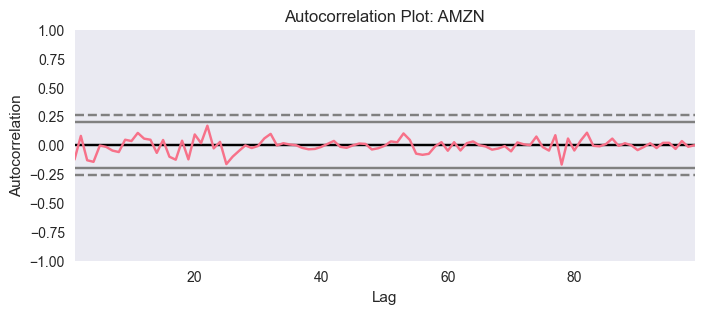

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

print("="*80)
print("STATISTICAL SUMMARY FOR ALL STOCKS")
print("="*80)

print("\nMean (Daily Returns):")
print(df[stocks].mean().round(5))
print("\nStandard Deviation (Daily Returns):")
print(df[stocks].std().round(5))

print("\nVariance (Daily Returns):")
print(df[stocks].var().round(5))

print("\nCovariance Matrix:")
print(df[stocks].cov().round(5))

print("\nCorrelation Matrix:")
print(df[stocks].corr().round(3))

print("\nAutocorrelation (lag-1):")
for stock in stocks:
    autocorr = df[stock].autocorr(lag=1)
    print(f"{stock}: {autocorr:.4f}")

# 1. Time Series Plot of Returns
plt.figure(figsize=(14, 6))
for stock in stocks:
    plt.plot(df.index, df[stock], label=stock)
plt.title('Daily Returns of Each Stock')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# 2. Histogram of Returns
df[stocks].plot(kind='hist', bins=50, alpha=0.7, figsize=(12, 6))
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.show()

# 3. Boxplot of Returns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[stocks])
plt.title('Boxplot of Daily Returns')
plt.ylabel('Return')
plt.show()

# 4. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[stocks].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5. Pairplot (Scatterplot Matrix)
sns.pairplot(df[stocks])
plt.suptitle('Pairwise Scatterplots of Returns', y=1.02)
plt.show()

# 6. Autocorrelation Plot for Each Stock
for stock in stocks:
    plt.figure(figsize=(8, 3))
    autocorrelation_plot(df[stock].dropna())
    plt.title(f'Autocorrelation Plot: {stock}')
    plt.show()

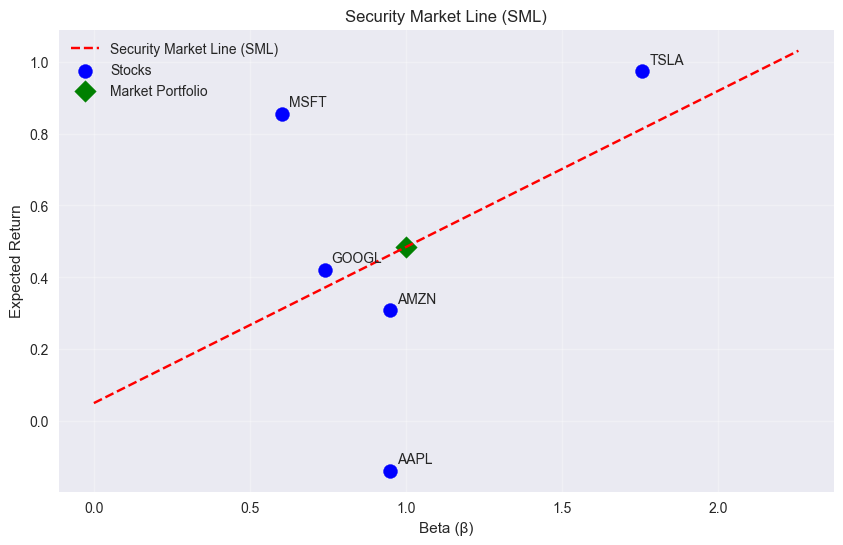

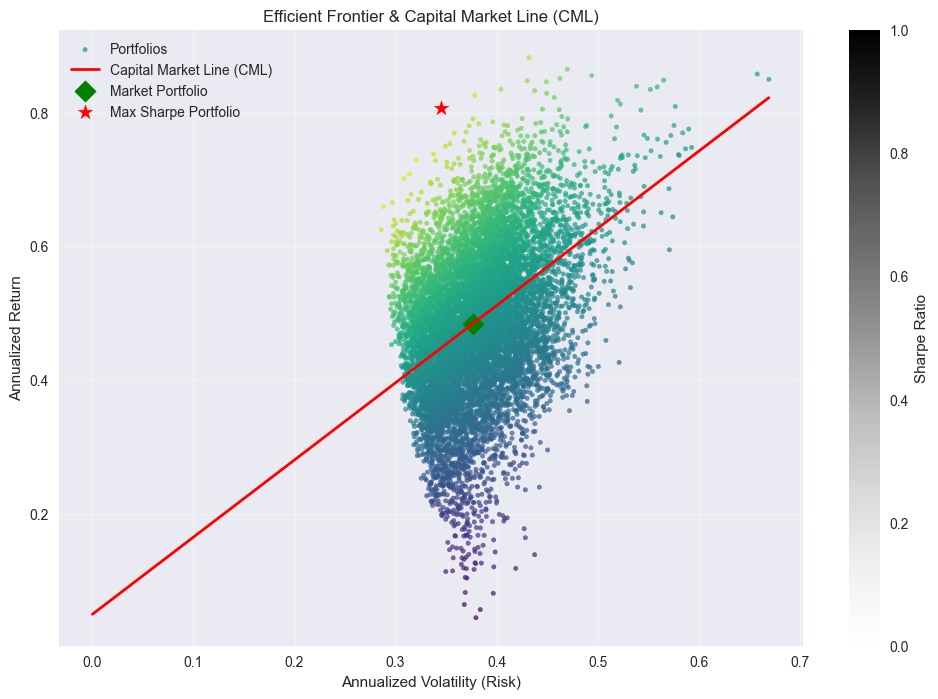

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Efficient Frontier (already calculated) ---
# results: [returns, volatility, sharpe] shape (3, num_portfolios)
# weights_record: list of weights for each portfolio
# mean_returns, cov_matrix, stock_cols already defined

# --- Find Max Sharpe and Min Volatility Portfolios ---
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])
max_sharpe_ret = results[0, max_sharpe_idx]
max_sharpe_vol = results[1, max_sharpe_idx]
min_vol_ret = results[0, min_vol_idx]
min_vol_vol = results[1, min_vol_idx]

# --- Security Market Line (SML) ---
betas = [capm_results[stock]['beta'] for stock in stock_cols]
actual_returns = [capm_results[stock]['actual_return'] for stock in stock_cols]
risk_free_rate = 0.05
market_return = df['Market_Portfolio'].mean() * 252

beta_range = np.linspace(0, max(betas) + 0.5, 100)
sml = risk_free_rate + beta_range * (market_return - risk_free_rate)

plt.figure(figsize=(10, 6))
plt.plot(beta_range, sml, 'r--', label='Security Market Line (SML)')
plt.scatter(betas, actual_returns, c='b', s=100, label='Stocks')
plt.scatter([1], [market_return], color='green', s=120, marker='D', label='Market Portfolio')
for i, stock in enumerate(stock_cols):
    plt.annotate(stock, (betas[i], actual_returns[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Beta (β)')
plt.ylabel('Expected Return')
plt.title('Security Market Line (SML)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Capital Market Line (CML) and Efficient Frontier ---
plt.figure(figsize=(12, 8))
# Efficient Frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10, alpha=0.7, label='Portfolios')
# CML
cml_x = np.linspace(0, max(results[1,:]), 100)
market_sharpe = (market_return - risk_free_rate) / (df['Market_Portfolio'].std() * np.sqrt(252))
cml_y = risk_free_rate + market_sharpe * cml_x
plt.plot(cml_x, cml_y, 'r-', linewidth=2, label='Capital Market Line (CML)')
# Highlight Market Portfolio and Max Sharpe Portfolio
plt.scatter([df['Market_Portfolio'].std() * np.sqrt(252)], [market_return], color='green', s=120, marker='D', label='Market Portfolio')
plt.scatter([max_sharpe_vol], [max_sharpe_ret], color='red', s=120, marker='*', label='Max Sharpe Portfolio')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier & Capital Market Line (CML)')
plt.colorbar(label='Sharpe Ratio')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

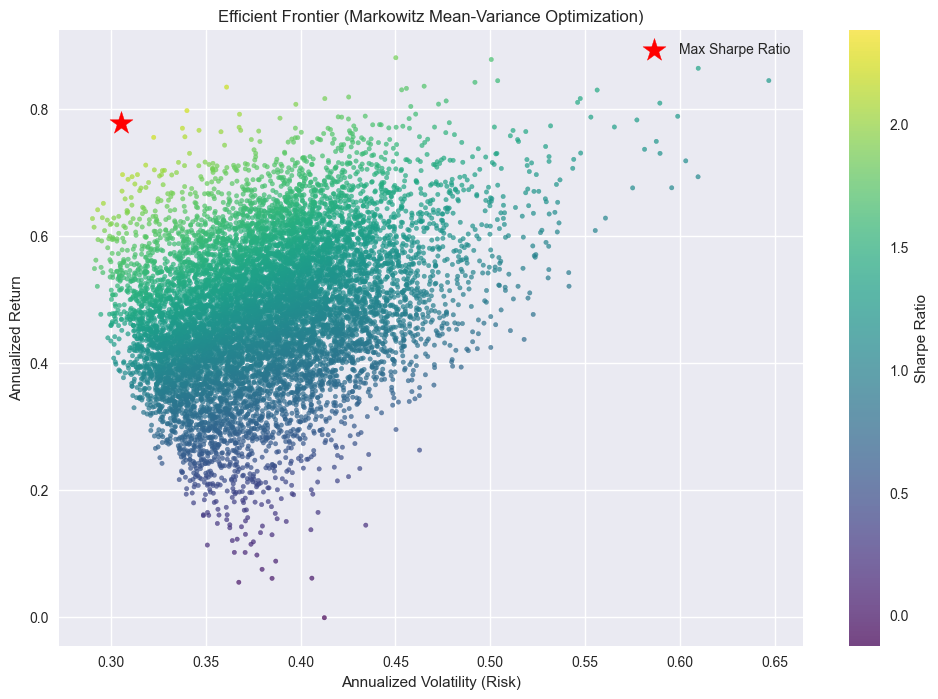

Optimal Portfolio Weights (Max Sharpe Ratio):
AAPL: 4.91%
MSFT: 75.98%
GOOGL: 6.55%
TSLA: 10.21%
AMZN: 2.36%
Maximum Sharpe Ratio Portfolio:
Sharpe Ratio: 2.3814
Annualized Return: 77.7535%
Annualized Volatility: 30.5510%
Weights:
  AAPL: 4.91%
  MSFT: 75.98%
  GOOGL: 6.55%
  TSLA: 10.21%
  AMZN: 2.36%

Efficient Frontier (first 10 portfolios):
Portfolio 1: Return=40.6631%, Volatility=34.5127%, Sharpe=1.0333
Portfolio 2: Return=40.3407%, Volatility=42.0101%, Sharpe=0.8412
Portfolio 3: Return=50.4774%, Volatility=33.7118%, Sharpe=1.3490
Portfolio 4: Return=56.1632%, Volatility=38.9592%, Sharpe=1.3133
Portfolio 5: Return=57.5759%, Volatility=36.8352%, Sharpe=1.4273
Portfolio 6: Return=45.7261%, Volatility=38.1179%, Sharpe=1.0684
Portfolio 7: Return=49.3652%, Volatility=38.9301%, Sharpe=1.1396
Portfolio 8: Return=56.5501%, Volatility=39.2571%, Sharpe=1.3131
Portfolio 9: Return=51.0321%, Volatility=37.2168%, Sharpe=1.2369
Portfolio 10: Return=39.4089%, Volatility=33.8950%, Sharpe=1.0152


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Use only the stock columns (exclude 'Market_Portfolio' if present)
stock_cols = [col for col in df.columns if col != 'Market_Portfolio']
returns = df[stock_cols]

# Annualized mean returns and covariance matrix
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(stock_cols))
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - 0.05) / portfolio_stddev  # 0.05 = risk-free rate
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = sharpe_ratio

# Plot Efficient Frontier
plt.figure(figsize=(12,8))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o', s=10, alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier (Markowitz Mean-Variance Optimization)')

# Highlight the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], color='red', marker='*', s=300, label='Max Sharpe Ratio')
plt.legend()
plt.show()

# Print weights of the max Sharpe ratio portfolio
print("Optimal Portfolio Weights (Max Sharpe Ratio):")
for stock, weight in zip(stock_cols, weights_record[max_sharpe_idx]):
    print(f"{stock}: {weight:.2%}")



 # Maximum Sharpe Ratio Portfolio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_ratio = results[2, max_sharpe_idx]
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

print("Maximum Sharpe Ratio Portfolio:")
print(f"Sharpe Ratio: {max_sharpe_ratio:.4f}")
print(f"Annualized Return: {max_sharpe_return:.4%}")
print(f"Annualized Volatility: {max_sharpe_volatility:.4%}")
print("Weights:")
for stock, weight in zip(stock_cols, weights_record[max_sharpe_idx]):
    print(f"  {stock}: {weight:.2%}")

# Efficient Frontier (all simulated portfolios)
print("\nEfficient Frontier (first 10 portfolios):")
for i in range(10):
    print(f"Portfolio {i+1}: Return={results[0,i]:.4%}, Volatility={results[1,i]:.4%}, Sharpe={results[2,i]:.4f}")   

CAPITAL ASSET PRICING MODEL (CAPM) ANALYSIS

Dataset Overview:
Period: 2025-03-12 to 2025-08-01
Number of trading days: 99
Stocks analyzed: AAPL, MSFT, GOOGL, TSLA, AMZN

Basic Statistics (Daily Returns):
          AAPL     MSFT    GOOGL     TSLA     AMZN
count  99.0000  99.0000  99.0000  99.0000  99.0000
mean   -0.0005   0.0034   0.0017   0.0039   0.0012
std     0.0262   0.0179   0.0217   0.0480   0.0259
min    -0.0925  -0.0366  -0.0726  -0.1426  -0.0898
25%    -0.0107  -0.0035  -0.0114  -0.0230  -0.0105
50%     0.0010   0.0019   0.0024   0.0010   0.0011
75%     0.0071   0.0086   0.0157   0.0350   0.0141
max     0.1533   0.1013   0.0968   0.2269   0.1198

SECTION 1: MARKET PORTFOLIO CONSTRUCTION

Market Portfolio Statistics:
Mean Daily Return: 0.0019 (48.43% annualized)
Daily Volatility: 0.0237 (37.66% annualized)
Sharpe Ratio (assuming 0% risk-free rate): 1.2861

SECTION 2: CAPM BETA CALCULATIONS

CAPM Analysis Results:
Stock    Beta     Alpha      R²       Expected Return Actual Ret

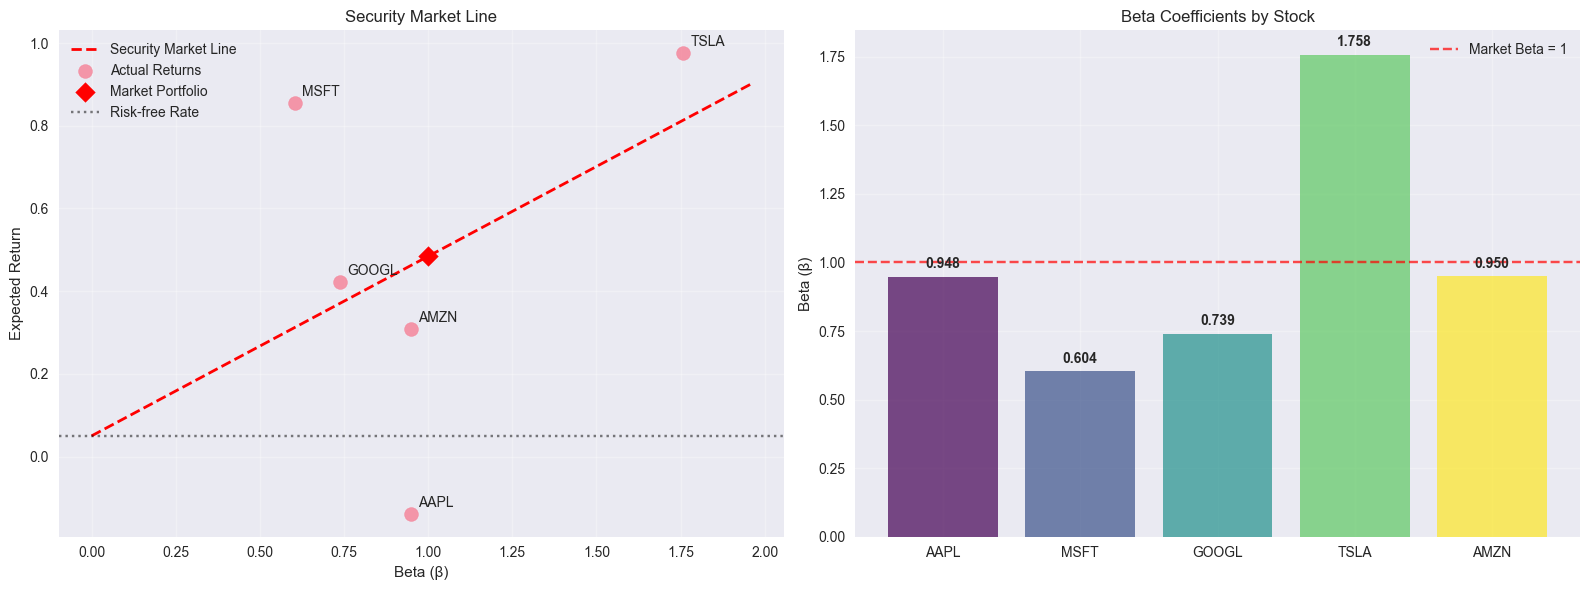


SECTION 4: RISK-RETURN ANALYSIS

Risk-Return Metrics:
Stock    Annual Return   Annual Volatility  Sharpe Ratio Beta    
-----------------------------------------------------------------
AAPL     -13.82%         41.56%             -0.453       0.948   
MSFT     85.55%          28.36%             2.840        0.604   
GOOGL    42.12%          34.49%             1.076        0.739   
TSLA     97.48%          76.27%             1.213        1.758   
AMZN     30.83%          41.13%             0.628        0.950   


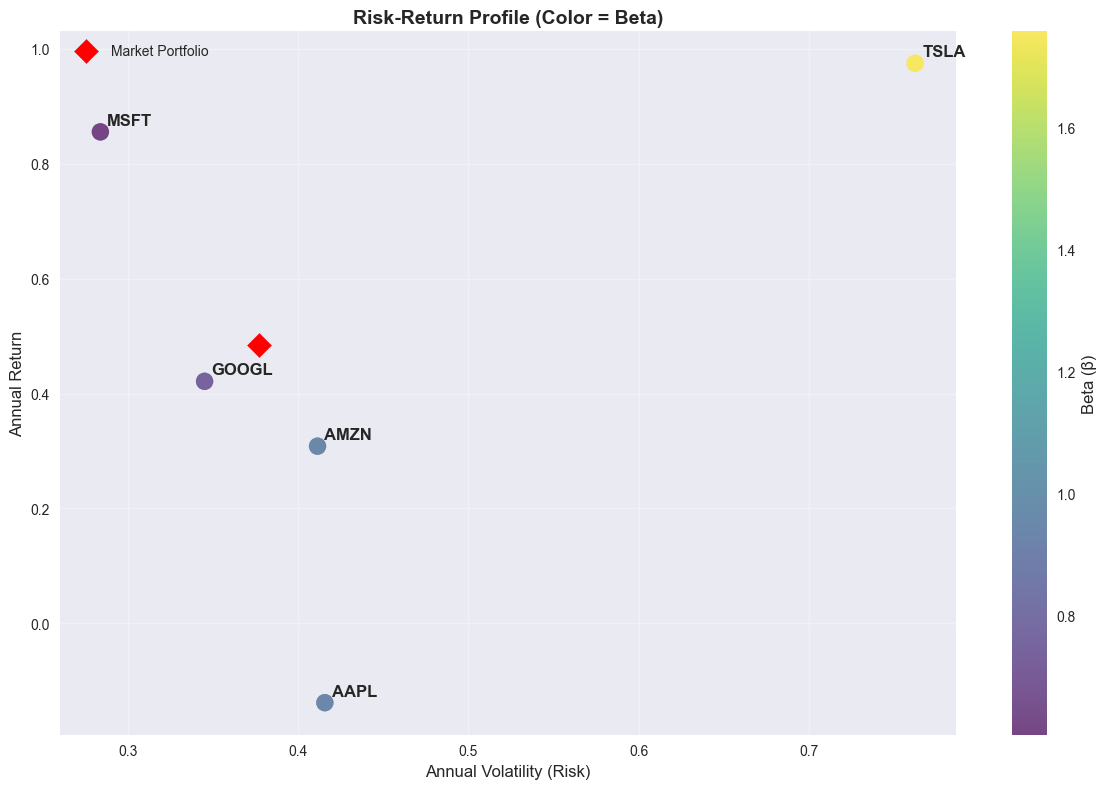


SECTION 5: CORRELATION ANALYSIS

Correlation Matrix:
        AAPL   MSFT  GOOGL   TSLA   AMZN
AAPL   1.000  0.672  0.620  0.642  0.748
MSFT   0.672  1.000  0.632  0.549  0.757
GOOGL  0.620  0.632  1.000  0.587  0.706
TSLA   0.642  0.549  0.587  1.000  0.600
AMZN   0.748  0.757  0.706  0.600  1.000


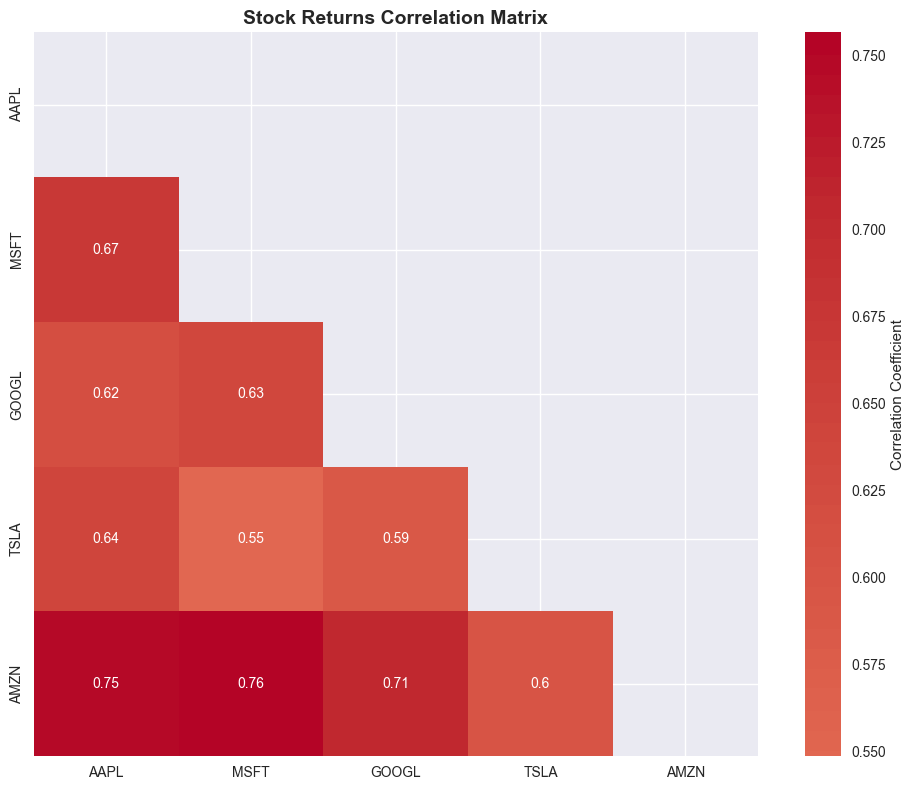


SECTION 6: PERFORMANCE EVALUATION

Jensen's Alpha Analysis:
Stock    Alpha      T-Stat     Significance   
---------------------------------------------
AAPL     -0.6000    -0.66      Not Significant
MSFT     0.5431     0.75       Not Significant
GOOGL    0.0501     0.06       Not Significant
TSLA     0.1613     0.10       Not Significant
AMZN     -0.1544    -0.18      Not Significant

SECTION 7: KEY FINDINGS AND INSIGHTS

📊 PORTFOLIO COMPOSITION:
   • Analysis period: 99 trading days
   • Stocks analyzed: 5 (AAPL, MSFT, GOOGL, TSLA, AMZN)
   • Market portfolio: Equal-weighted combination

📈 BETA ANALYSIS:
   • High Beta (>1.2): TSLA
   • Low Beta (<0.8): MSFT, GOOGL
   • Best risk-adjusted return: MSFT (Sharpe: 2.840)
   • Worst risk-adjusted return: AAPL (Sharpe: -0.453)

🎯 ALPHA GENERATION:
   • Positive Alpha: MSFT, GOOGL, TSLA
   • Negative Alpha: AAPL, AMZN

🔄 CORRELATION INSIGHTS:
   • Average inter-stock correlation: 0.651
   • Highest correlation: 0.757

💡 INVESTMENT IMPLICAT

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*80)
print("CAPITAL ASSET PRICING MODEL (CAPM) ANALYSIS")
print("="*80)

# Load the data
df = pd.read_csv('D:\\Real Time Finance API Client\\Data\\all_stocks_daily_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(f"\nDataset Overview:")
print(f"Period: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"Number of trading days: {len(df)}")
print(f"Stocks analyzed: {', '.join(df.columns)}")

# Display basic statistics
print(f"\nBasic Statistics (Daily Returns):")
print(df.describe().round(4))

# ============================================================================
# SECTION 1: MARKET PORTFOLIO CREATION
# ============================================================================
print("\n" + "="*80)
print("SECTION 1: MARKET PORTFOLIO CONSTRUCTION")
print("="*80)

# Create equal-weighted market portfolio
df['Market_Portfolio'] = df.mean(axis=1)

print(f"\nMarket Portfolio Statistics:")
print(f"Mean Daily Return: {df['Market_Portfolio'].mean():.4f} ({df['Market_Portfolio'].mean()*252:.2%} annualized)")
print(f"Daily Volatility: {df['Market_Portfolio'].std():.4f} ({df['Market_Portfolio'].std()*np.sqrt(252):.2%} annualized)")
print(f"Sharpe Ratio (assuming 0% risk-free rate): {(df['Market_Portfolio'].mean()/df['Market_Portfolio'].std()*np.sqrt(252)):.4f}")

# ============================================================================
# SECTION 2: CAPM CALCULATIONS
# ============================================================================
print("\n" + "="*80)
print("SECTION 2: CAPM BETA CALCULATIONS")
print("="*80)

# Assume risk-free rate (you can modify this)
risk_free_rate_daily = 0.05 / 252  # 5% annual risk-free rate
risk_free_rate_annual = 0.05

# Calculate excess returns
excess_returns = df.copy()
for col in df.columns:
    excess_returns[col] = df[col] - risk_free_rate_daily

# Calculate CAPM metrics for each stock
capm_results = {}
stocks = [col for col in df.columns if col != 'Market_Portfolio']

print(f"\nCAPM Analysis Results:")
print(f"{'Stock':<8} {'Beta':<8} {'Alpha':<10} {'R²':<8} {'Expected Return':<15} {'Actual Return':<15}")
print("-" * 75)

for stock in stocks:
    # Calculate beta using regression
    x = excess_returns['Market_Portfolio'].values
    y = excess_returns[stock].values
    
    # Remove any NaN values
    mask = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[mask]
    y_clean = y[mask]
    
    # Perform regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
    
    beta = slope
    alpha = intercept
    r_squared = r_value ** 2
    
    # Calculate expected return using CAPM
    market_return = df['Market_Portfolio'].mean() * 252  # Annualized
    expected_return_annual = risk_free_rate_annual + beta * (market_return - risk_free_rate_annual)
    actual_return_annual = df[stock].mean() * 252
    
    capm_results[stock] = {
        'beta': beta,
        'alpha': alpha * 252,  # Annualized alpha
        'r_squared': r_squared,
        'expected_return': expected_return_annual,
        'actual_return': actual_return_annual,
        'p_value': p_value,
        'std_error': std_err
    }
    
    print(f"{stock:<8} {beta:<8.3f} {alpha*252:<10.4f} {r_squared:<8.3f} {expected_return_annual:<15.2%} {actual_return_annual:<15.2%}")

# ============================================================================
# SECTION 3: SECURITY MARKET LINE
# ============================================================================
print("\n" + "="*80)
print("SECTION 3: SECURITY MARKET LINE ANALYSIS")
print("="*80)

# Create Security Market Line plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Security Market Line
betas = [capm_results[stock]['beta'] for stock in stocks]
expected_returns = [capm_results[stock]['expected_return'] for stock in stocks]
actual_returns = [capm_results[stock]['actual_return'] for stock in stocks]

# SML line
beta_range = np.linspace(0, max(betas) + 0.2, 100)
sml_returns = risk_free_rate_annual + beta_range * (df['Market_Portfolio'].mean() * 252 - risk_free_rate_annual)

ax1.plot(beta_range, sml_returns, 'r--', label='Security Market Line', linewidth=2)
ax1.scatter(betas, actual_returns, s=100, alpha=0.7, label='Actual Returns')
ax1.scatter([1], [df['Market_Portfolio'].mean() * 252], color='red', s=100, marker='D', label='Market Portfolio')

for i, stock in enumerate(stocks):
    ax1.annotate(stock, (betas[i], actual_returns[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

ax1.axhline(y=risk_free_rate_annual, color='black', linestyle=':', alpha=0.5, label='Risk-free Rate')
ax1.set_xlabel('Beta (β)')
ax1.set_ylabel('Expected Return')
ax1.set_title('Security Market Line')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Beta comparison
colors = plt.cm.viridis(np.linspace(0, 1, len(stocks)))
bars = ax2.bar(stocks, betas, color=colors, alpha=0.7)
ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Market Beta = 1')
ax2.set_ylabel('Beta (β)')
ax2.set_title('Beta Coefficients by Stock')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, beta in zip(bars, betas):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{beta:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 4: RISK-RETURN ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SECTION 4: RISK-RETURN ANALYSIS")
print("="*80)

# Calculate risk metrics
risk_metrics = {}
for stock in stocks:
    annual_return = df[stock].mean() * 252
    annual_volatility = df[stock].std() * np.sqrt(252)
    sharpe_ratio = (annual_return - risk_free_rate_annual) / annual_volatility
    
    risk_metrics[stock] = {
        'annual_return': annual_return,
        'annual_volatility': annual_volatility,
        'sharpe_ratio': sharpe_ratio
    }

print(f"\nRisk-Return Metrics:")
print(f"{'Stock':<8} {'Annual Return':<15} {'Annual Volatility':<18} {'Sharpe Ratio':<12} {'Beta':<8}")
print("-" * 65)

for stock in stocks:
    print(f"{stock:<8} {risk_metrics[stock]['annual_return']:<15.2%} {risk_metrics[stock]['annual_volatility']:<18.2%} "
          f"{risk_metrics[stock]['sharpe_ratio']:<12.3f} {capm_results[stock]['beta']:<8.3f}")

# Risk-Return scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

volatilities = [risk_metrics[stock]['annual_volatility'] for stock in stocks]
returns = [risk_metrics[stock]['annual_return'] for stock in stocks]

scatter = ax.scatter(volatilities, returns, s=150, alpha=0.7, c=betas, cmap='viridis')
ax.scatter([df['Market_Portfolio'].std() * np.sqrt(252)], [df['Market_Portfolio'].mean() * 252], 
           color='red', s=150, marker='D', label='Market Portfolio')

for i, stock in enumerate(stocks):
    ax.annotate(stock, (volatilities[i], returns[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=12, fontweight='bold')

ax.set_xlabel('Annual Volatility (Risk)', fontsize=12)
ax.set_ylabel('Annual Return', fontsize=12)
ax.set_title('Risk-Return Profile (Color = Beta)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

# Add colorbar for beta values
cbar = plt.colorbar(scatter)
cbar.set_label('Beta (β)', fontsize=12)

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 5: CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SECTION 5: CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation matrix
correlation_matrix = df[stocks].corr()
print(f"\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Stock Returns Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 6: PERFORMANCE EVALUATION
# ============================================================================
print("\n" + "="*80)
print("SECTION 6: PERFORMANCE EVALUATION")
print("="*80)

print(f"\nJensen's Alpha Analysis:")
print(f"{'Stock':<8} {'Alpha':<10} {'T-Stat':<10} {'Significance':<15}")
print("-" * 45)

for stock in stocks:
    alpha = capm_results[stock]['alpha']
    t_stat = alpha / (capm_results[stock]['std_error'] * np.sqrt(252))
    significance = "Significant" if abs(t_stat) > 1.96 else "Not Significant"
    
    print(f"{stock:<8} {alpha:<10.4f} {t_stat:<10.2f} {significance:<15}")

# ============================================================================
# SECTION 7: SUMMARY AND INSIGHTS
# ============================================================================
print("\n" + "="*80)
print("SECTION 7: KEY FINDINGS AND INSIGHTS")
print("="*80)

print(f"\n📊 PORTFOLIO COMPOSITION:")
print(f"   • Analysis period: {len(df)} trading days")
print(f"   • Stocks analyzed: {len(stocks)} (AAPL, MSFT, GOOGL, TSLA, AMZN)")
print(f"   • Market portfolio: Equal-weighted combination")

print(f"\n📈 BETA ANALYSIS:")
high_beta = [stock for stock in stocks if capm_results[stock]['beta'] > 1.2]
low_beta = [stock for stock in stocks if capm_results[stock]['beta'] < 0.8]
print(f"   • High Beta (>1.2): {', '.join(high_beta) if high_beta else 'None'}")
print(f"   • Low Beta (<0.8): {', '.join(low_beta) if low_beta else 'None'}")

best_sharpe = max(stocks, key=lambda x: risk_metrics[x]['sharpe_ratio'])
worst_sharpe = min(stocks, key=lambda x: risk_metrics[x]['sharpe_ratio'])
print(f"   • Best risk-adjusted return: {best_sharpe} (Sharpe: {risk_metrics[best_sharpe]['sharpe_ratio']:.3f})")
print(f"   • Worst risk-adjusted return: {worst_sharpe} (Sharpe: {risk_metrics[worst_sharpe]['sharpe_ratio']:.3f})")

print(f"\n🎯 ALPHA GENERATION:")
positive_alpha = [stock for stock in stocks if capm_results[stock]['alpha'] > 0]
negative_alpha = [stock for stock in stocks if capm_results[stock]['alpha'] < 0]
print(f"   • Positive Alpha: {', '.join(positive_alpha) if positive_alpha else 'None'}")
print(f"   • Negative Alpha: {', '.join(negative_alpha) if negative_alpha else 'None'}")

print(f"\n🔄 CORRELATION INSIGHTS:")
avg_correlation = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean()
print(f"   • Average inter-stock correlation: {avg_correlation:.3f}")
most_correlated = correlation_matrix.unstack().drop_duplicates().nlargest(2).iloc[1]
print(f"   • Highest correlation: {most_correlated:.3f}")

print(f"\n💡 INVESTMENT IMPLICATIONS:")
print(f"   • Market timing: Stocks with beta > 1 amplify market movements")
print(f"   • Diversification: Consider correlation when building portfolios")
print(f"   • Alpha opportunities: Focus on stocks with significant positive alpha")
print(f"   • Risk management: High-beta stocks require careful position sizing")

print(f"\n📋 METHODOLOGY NOTES:")
print(f"   • Risk-free rate assumed: {risk_free_rate_annual:.1%} annually")
print(f"   • Beta calculated using linear regression of excess returns")
print(f"   • Statistical significance tested at 95% confidence level")
print(f"   • Returns annualized using 252 trading days")

print(f"\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

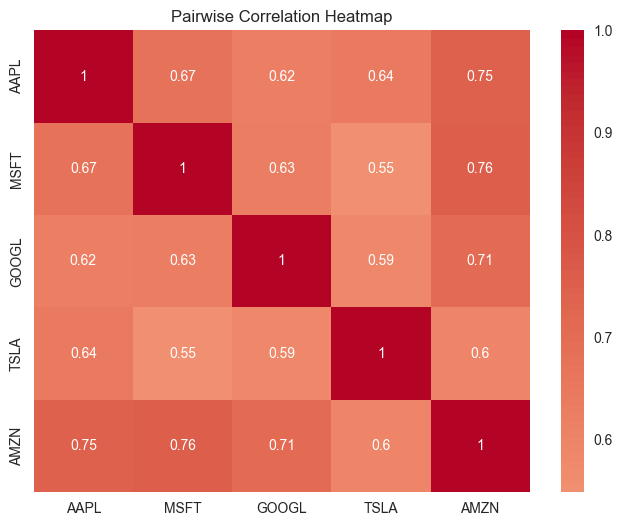

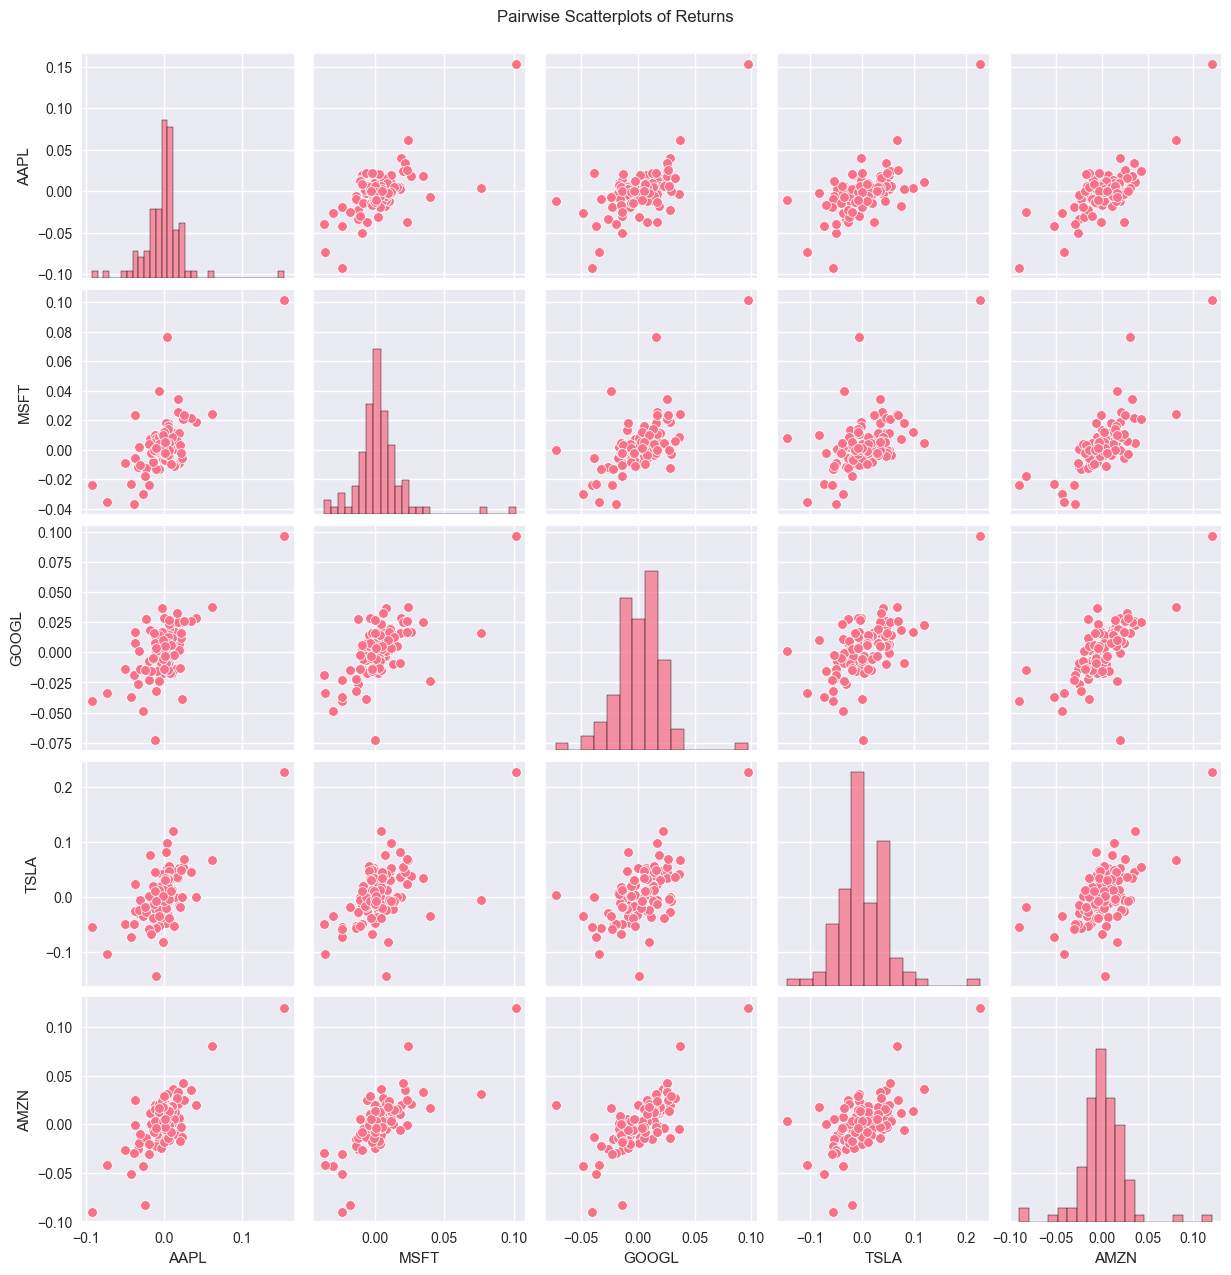

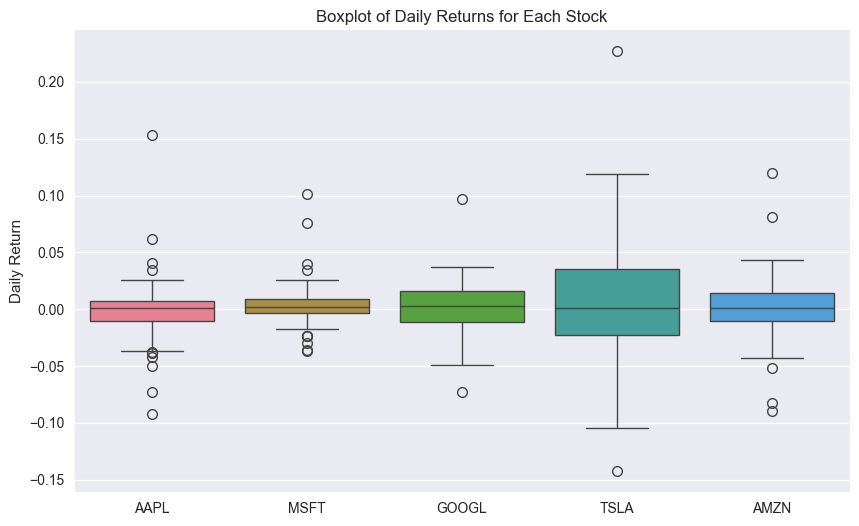

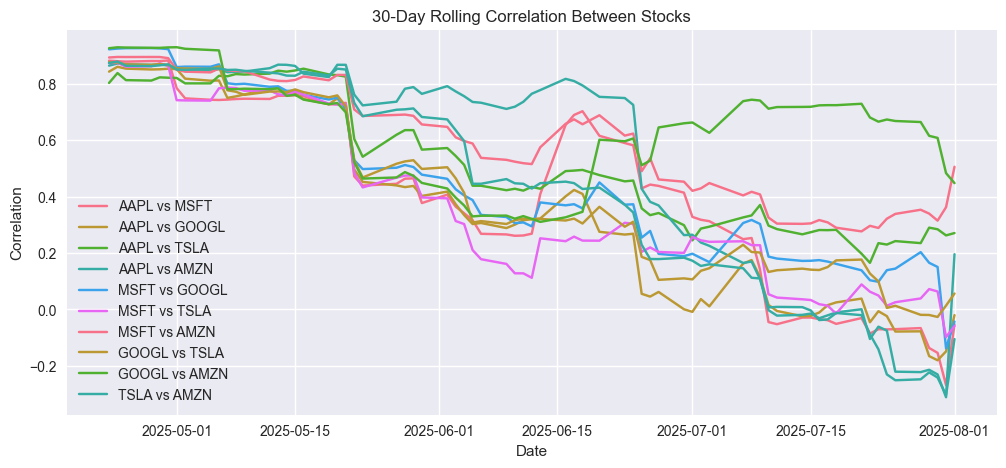

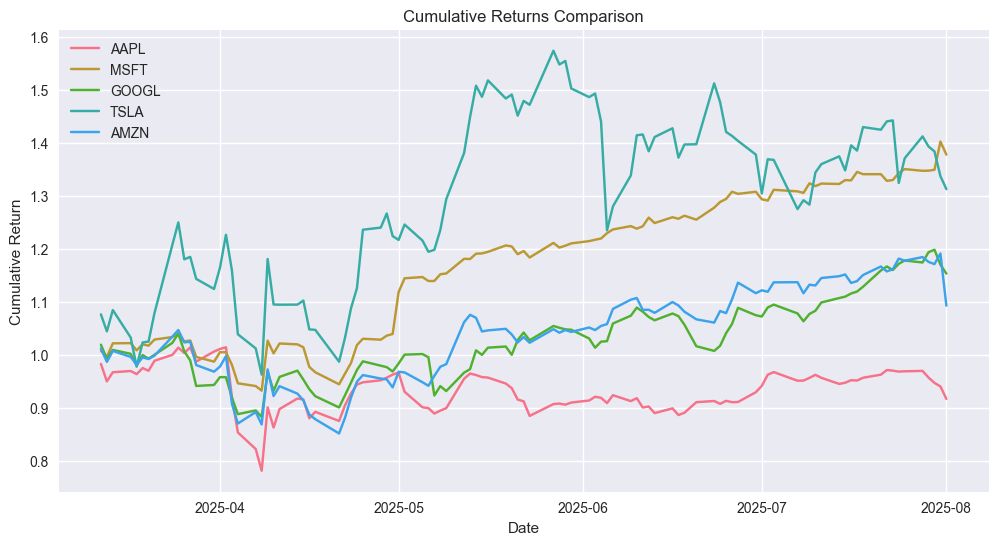

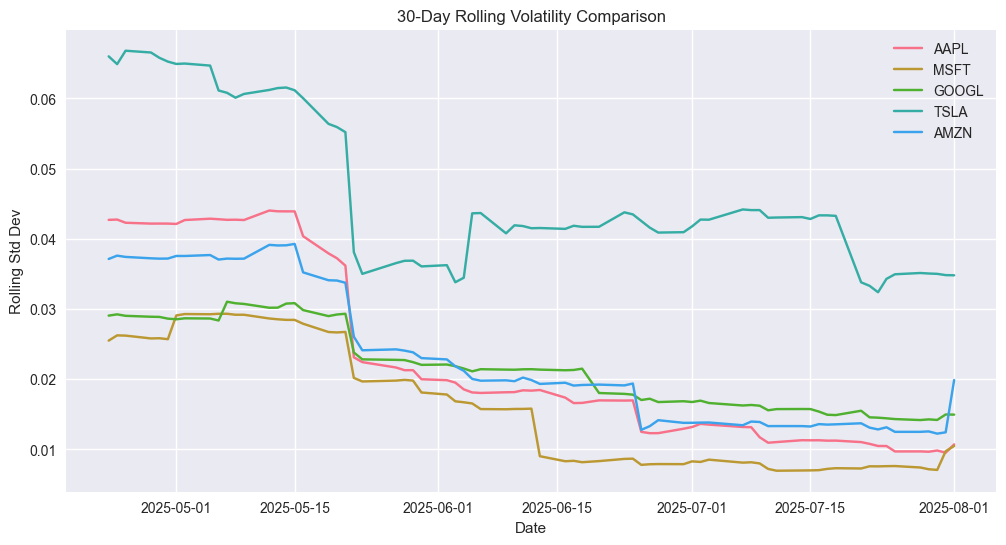

PAIRWISE STATISTICAL REPORT

Pairwise Correlation Matrix:
        AAPL   MSFT  GOOGL   TSLA   AMZN
AAPL   1.000  0.672  0.620  0.642  0.748
MSFT   0.672  1.000  0.632  0.549  0.757
GOOGL  0.620  0.632  1.000  0.587  0.706
TSLA   0.642  0.549  0.587  1.000  0.600
AMZN   0.748  0.757  0.706  0.600  1.000

Descriptive Statistics (Mean, Std, Min, Max):
         mean     std     min     max
AAPL  -0.0005  0.0262 -0.0925  0.1533
MSFT   0.0034  0.0179 -0.0366  0.1013
GOOGL  0.0017  0.0217 -0.0726  0.0968
TSLA   0.0039  0.0480 -0.1426  0.2269
AMZN   0.0012  0.0259 -0.0898  0.1198

Highest Correlation: 0.757 between ('AMZN', 'MSFT')
Lowest Correlation: 0.549 between ('TSLA', 'MSFT')


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Pairwise Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[stock_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Pairwise Correlation Heatmap')
plt.show()

# 2. Pairplot (Scatterplot Matrix)
sns.pairplot(df[stock_cols])
plt.suptitle('Pairwise Scatterplots of Returns', y=1.02)
plt.show()

# 3. Boxplot for Each Stock
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[stock_cols])
plt.title('Boxplot of Daily Returns for Each Stock')
plt.ylabel('Daily Return')
plt.show()

# 4. Rolling Correlation (example: first two stocks)
plt.figure(figsize=(12, 5))
for i in range(len(stock_cols)):
    for j in range(i+1, len(stock_cols)):
        rolling_corr = df[stock_cols[i]].rolling(window=30).corr(df[stock_cols[j]])
        plt.plot(df.index, rolling_corr, label=f'{stock_cols[i]} vs {stock_cols[j]}')
plt.title('30-Day Rolling Correlation Between Stocks')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

# 5. Cumulative Returns Comparison
cumulative_returns = (1 + df[stock_cols]).cumprod()
plt.figure(figsize=(12, 6))
for stock in stock_cols:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# 6. Volatility Comparison (Rolling Std)
plt.figure(figsize=(12, 6))
for stock in stock_cols:
    plt.plot(df.index, df[stock].rolling(window=30).std(), label=stock)
plt.title('30-Day Rolling Volatility Comparison')
plt.xlabel('Date')
plt.ylabel('Rolling Std Dev')
plt.legend()
plt.show()

# 7. Report: Pairwise Correlation, Mean, Std, Min, Max
print("="*80)
print("PAIRWISE STATISTICAL REPORT")
print("="*80)
corr_matrix = df[stock_cols].corr()
print("\nPairwise Correlation Matrix:")
print(corr_matrix.round(3))

stats_report = df[stock_cols].agg(['mean', 'std', 'min', 'max']).T
print("\nDescriptive Statistics (Mean, Std, Min, Max):")
print(stats_report.round(4))

# 8. Report: Highest and Lowest Correlated Pairs
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
sorted_corr = corr_pairs.sort_values(ascending=False)
highest = sorted_corr[0]
lowest = sorted_corr[-1]
print(f"\nHighest Correlation: {highest:.3f} between {sorted_corr.index[0]}")
print(f"Lowest Correlation: {lowest:.3f} between {sorted_corr.index[-1]}")

COMPREHENSIVE STOCK ANALYSIS REPORT
Generated on: 2025-08-03 01:56:54
Analysis Period: 2025-03-12 to 2025-08-01
Total Trading Days: 99
Stocks Analyzed: AAPL, MSFT, GOOGL, TSLA, AMZN

1. CORRELATION ANALYSIS


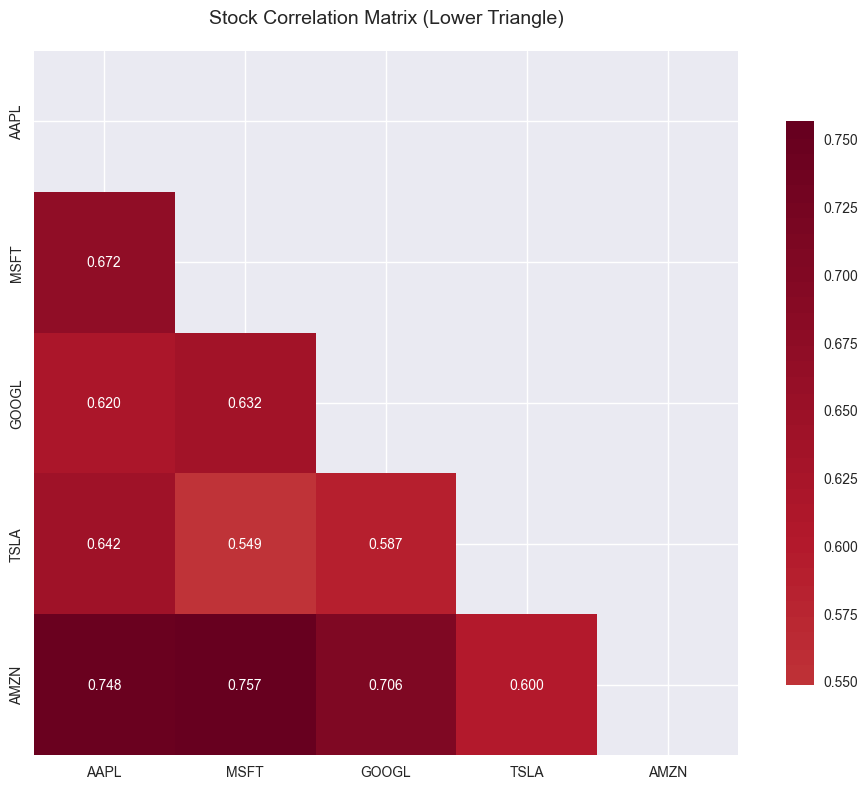


📈 CORRELATION KEY FINDINGS:
• Highest Positive Correlation: 0.757 between MSFT and AMZN
• Lowest Correlation: 0.549 between MSFT and TSLA
• High Correlations (>0.7): 3 pairs
• Low Correlations (<0.3): 0 pairs
• Negative Correlations: 0 pairs

Strongly Correlated Pairs:
  - MSFT & AMZN: 0.757
  - AAPL & AMZN: 0.748
  - GOOGL & AMZN: 0.706

2. RETURN ANALYSIS

📊 COMPREHENSIVE STATISTICS:
         mean     std     min     max    skew     kurt  mean_annual  \
AAPL  -0.0005  0.0262 -0.0925  0.1533  1.4220  13.0750      -0.1382   
MSFT   0.0034  0.0179 -0.0366  0.1013  2.1911  11.0034       0.8555   
GOOGL  0.0017  0.0217 -0.0726  0.0968  0.2262   3.7919       0.4212   
TSLA   0.0039  0.0480 -0.1426  0.2269  0.7821   4.4634       0.9748   
AMZN   0.0012  0.0259 -0.0898  0.1198  0.4015   6.2052       0.3083   

       std_annual  sharpe_ratio  
AAPL       0.4156       -0.4530  
MSFT       0.2836        2.8400  
GOOGL      0.3449        1.0763  
TSLA       0.7627        1.2126  
AMZN       0.

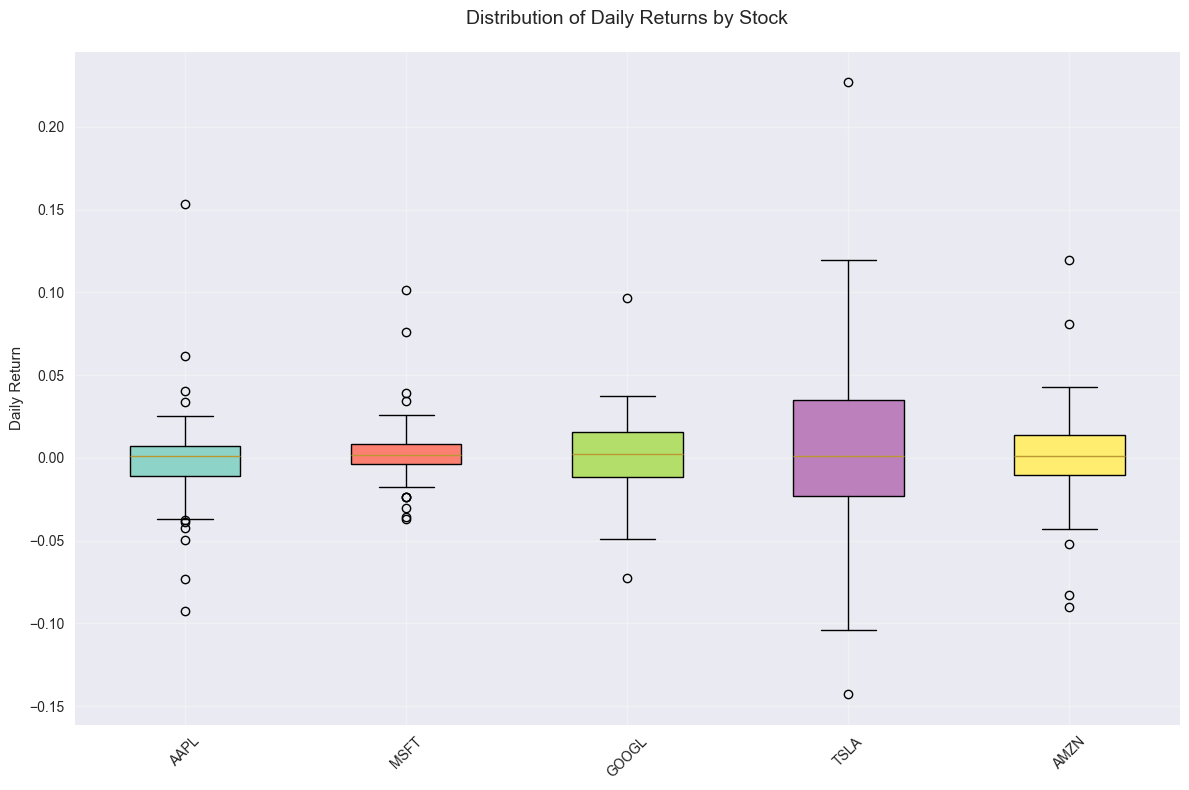


🏆 PERFORMANCE RANKINGS:
By Annualized Return:
  1. TSLA: 97.48% (Volatility: 76.27%)
  2. MSFT: 85.55% (Volatility: 28.36%)
  3. GOOGL: 42.12% (Volatility: 34.49%)
  4. AMZN: 30.83% (Volatility: 41.13%)
  5. AAPL: -13.82% (Volatility: 41.56%)

By Risk-Adjusted Return (Sharpe Ratio):
  1. MSFT: 2.840
  2. TSLA: 1.213
  3. GOOGL: 1.076
  4. AMZN: 0.628
  5. AAPL: -0.453

3. VOLATILITY ANALYSIS


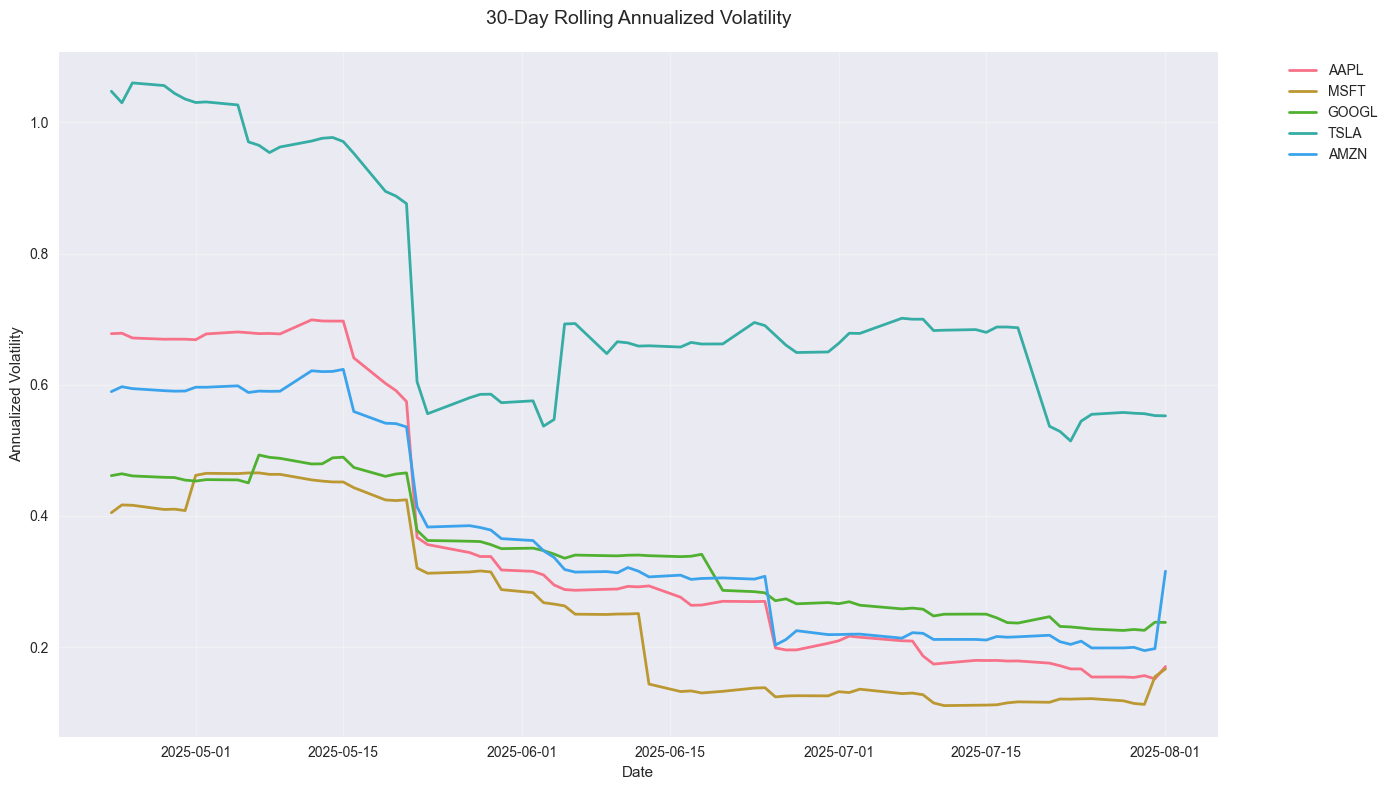


📉 VOLATILITY KEY FINDINGS:
• Average Volatility: 44.36%
• Most Volatile Stock: TSLA (76.27%)
• Least Volatile Stock: MSFT (28.36%)
• Volatility Range: 28.36% - 76.27%

4. CUMULATIVE PERFORMANCE ANALYSIS


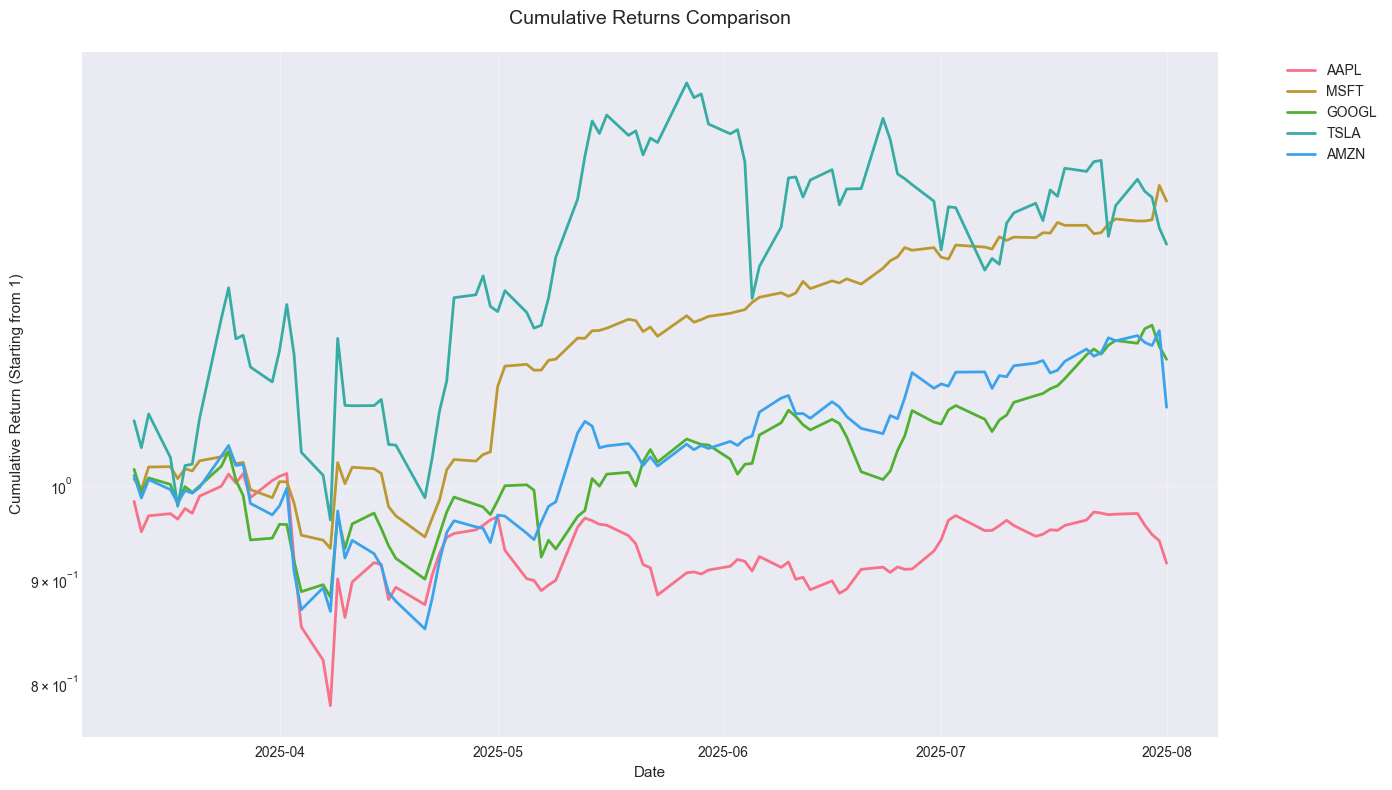


📈 TOTAL RETURN PERFORMANCE:
  1. MSFT: 37.76%
  2. TSLA: 31.25%
  3. GOOGL: 15.30%
  4. AMZN: 9.24%
  5. AAPL: -8.36%

5. DYNAMIC CORRELATION ANALYSIS


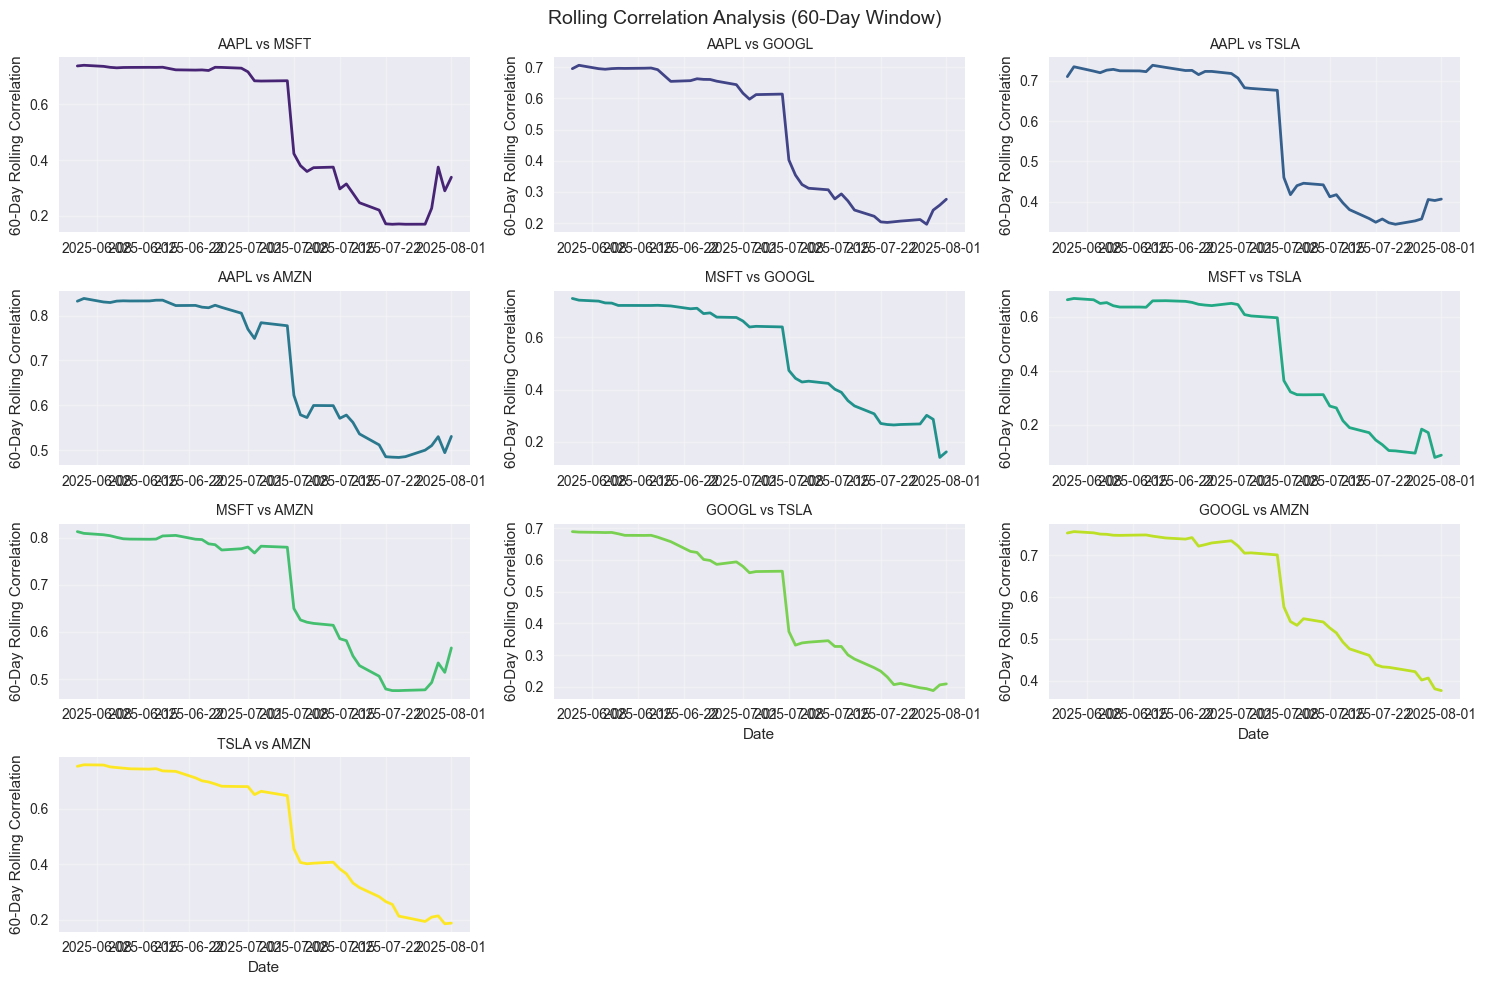


🔄 CORRELATION STABILITY:
• AAPL-MSFT: Mean=0.514, Volatility=0.232
• AAPL-GOOGL: Mean=0.475, Volatility=0.209
• AAPL-TSLA: Mean=0.564, Volatility=0.166
• AAPL-AMZN: Mean=0.684, Volatility=0.145
• MSFT-GOOGL: Mean=0.525, Volatility=0.203
• MSFT-TSLA: Mean=0.433, Volatility=0.233
• MSFT-AMZN: Mean=0.676, Volatility=0.132
• GOOGL-TSLA: Mean=0.462, Volatility=0.194
• GOOGL-AMZN: Mean=0.610, Volatility=0.142
• TSLA-AMZN: Mean=0.517, Volatility=0.221

6. RISK METRICS

⚠️  RISK METRICS:
       VaR_95  CVaR_95  Max_Drawdown  Positive_Days
AAPL  -0.0375  -0.0593       -0.2519         0.5455
MSFT  -0.0234  -0.0299       -0.1067         0.5960
GOOGL -0.0343  -0.0474       -0.1608         0.5455
TSLA  -0.0585  -0.0939       -0.2480         0.5253
AMZN  -0.0317  -0.0617       -0.1898         0.5253

EXECUTIVE SUMMARY & KEY FINDINGS

🎯 KEY INSIGHTS:
• Best Overall Performer: MSFT (37.76% total return)
• Best Risk-Adjusted Return: MSFT (Sharpe: 2.840)
• Highest Volatility: TSLA (76.27%)
• Most Stabl

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*100)
print("COMPREHENSIVE STOCK ANALYSIS REPORT")
print("="*100)
print(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Analysis Period: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")
print(f"Total Trading Days: {len(df)}")
print(f"Stocks Analyzed: {', '.join(stock_cols)}")
print("="*100)

# 1. CORRELATION ANALYSIS
print("\n" + "="*50)
print("1. CORRELATION ANALYSIS")
print("="*50)

plt.figure(figsize=(10, 8))
corr_matrix = df[stock_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, mask=mask)
plt.title('Stock Correlation Matrix (Lower Triangle)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Correlation insights
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs = corr_pairs.drop_duplicates()
sorted_corr = corr_pairs.sort_values(ascending=False)

print(f"\n📈 CORRELATION KEY FINDINGS:")
print(f"• Highest Positive Correlation: {sorted_corr.iloc[0]:.3f} between {sorted_corr.index[0][0]} and {sorted_corr.index[0][1]}")
print(f"• Lowest Correlation: {sorted_corr.iloc[-1]:.3f} between {sorted_corr.index[-1][0]} and {sorted_corr.index[-1][1]}")

# Categorize correlations
high_corr = sorted_corr[sorted_corr > 0.7]
low_corr = sorted_corr[sorted_corr < 0.3]
negative_corr = sorted_corr[sorted_corr < 0]

print(f"• High Correlations (>0.7): {len(high_corr)} pairs")
print(f"• Low Correlations (<0.3): {len(low_corr)} pairs")
print(f"• Negative Correlations: {len(negative_corr)} pairs")

if len(high_corr) > 0:
    print("\nStrongly Correlated Pairs:")
    for (stock1, stock2), corr in high_corr.head(3).items():
        print(f"  - {stock1} & {stock2}: {corr:.3f}")

# 2. RETURN ANALYSIS
print("\n" + "="*50)
print("2. RETURN ANALYSIS")
print("="*50)

# Calculate comprehensive statistics
stats_report = df[stock_cols].agg(['mean', 'std', 'min', 'max', 'skew', 'kurt']).T
stats_report['mean_annual'] = stats_report['mean'] * 252
stats_report['std_annual'] = stats_report['std'] * np.sqrt(252)
stats_report['sharpe_ratio'] = (stats_report['mean_annual'] - 0.05) / stats_report['std_annual']

print("\n📊 COMPREHENSIVE STATISTICS:")
print(stats_report.round(4))

# Box plot analysis
plt.figure(figsize=(12, 8))
box_data = [df[stock].dropna() for stock in stock_cols]
box_plot = plt.boxplot(box_data, labels=stock_cols, patch_artist=True)
colors = plt.cm.Set3(np.linspace(0, 1, len(stock_cols)))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Distribution of Daily Returns by Stock', fontsize=14, pad=20)
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Performance ranking
print(f"\n🏆 PERFORMANCE RANKINGS:")
performance_rank = stats_report.sort_values('mean_annual', ascending=False)
print("By Annualized Return:")
for i, (stock, data) in enumerate(performance_rank.iterrows(), 1):
    print(f"  {i}. {stock}: {data['mean_annual']:.2%} (Volatility: {data['std_annual']:.2%})")

print("\nBy Risk-Adjusted Return (Sharpe Ratio):")
sharpe_rank = stats_report.sort_values('sharpe_ratio', ascending=False)
for i, (stock, data) in enumerate(sharpe_rank.iterrows(), 1):
    print(f"  {i}. {stock}: {data['sharpe_ratio']:.3f}")

# 3. VOLATILITY ANALYSIS
print("\n" + "="*50)
print("3. VOLATILITY ANALYSIS")
print("="*50)

plt.figure(figsize=(14, 8))
for i, stock in enumerate(stock_cols):
    rolling_vol = df[stock].rolling(window=30).std() * np.sqrt(252)  # Annualized volatility
    plt.plot(df.index, rolling_vol, label=f'{stock}', linewidth=2)

plt.title('30-Day Rolling Annualized Volatility', fontsize=14, pad=20)
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📉 VOLATILITY KEY FINDINGS:")
vol_stats = stats_report['std_annual'].describe()
print(f"• Average Volatility: {vol_stats['mean']:.2%}")
print(f"• Most Volatile Stock: {stats_report['std_annual'].idxmax()} ({stats_report['std_annual'].max():.2%})")
print(f"• Least Volatile Stock: {stats_report['std_annual'].idxmin()} ({stats_report['std_annual'].min():.2%})")
print(f"• Volatility Range: {vol_stats['min']:.2%} - {vol_stats['max']:.2%}")

# 4. CUMULATIVE PERFORMANCE
print("\n" + "="*50)
print("4. CUMULATIVE PERFORMANCE ANALYSIS")
print("="*50)

cumulative_returns = (1 + df[stock_cols]).cumprod()
plt.figure(figsize=(14, 8))
for stock in stock_cols:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], 
             label=f'{stock}', linewidth=2)

plt.title('Cumulative Returns Comparison', fontsize=14, pad=20)
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Starting from 1)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

final_returns = cumulative_returns.iloc[-1] - 1
print(f"\n📈 TOTAL RETURN PERFORMANCE:")
total_return_rank = final_returns.sort_values(ascending=False)
for i, (stock, ret) in enumerate(total_return_rank.items(), 1):
    print(f"  {i}. {stock}: {ret:.2%}")

# 5. ROLLING CORRELATION ANALYSIS
print("\n" + "="*50)
print("5. DYNAMIC CORRELATION ANALYSIS")
print("="*50)

plt.figure(figsize=(15, 10))
subplot_idx = 1
n_pairs = len(stock_cols) * (len(stock_cols) - 1) // 2
cols = min(3, n_pairs)
rows = (n_pairs + cols - 1) // cols

correlation_data = {}
for i in range(len(stock_cols)):
    for j in range(i+1, len(stock_cols)):
        stock1, stock2 = stock_cols[i], stock_cols[j]
        rolling_corr = df[stock1].rolling(window=60).corr(df[stock2])
        correlation_data[f"{stock1}-{stock2}"] = rolling_corr
        
        plt.subplot(rows, cols, subplot_idx)
        plt.plot(df.index, rolling_corr, linewidth=2, color=plt.cm.viridis(subplot_idx/n_pairs))
        plt.title(f'{stock1} vs {stock2}', fontsize=10)
        plt.ylabel('60-Day Rolling Correlation')
        plt.grid(True, alpha=0.3)
        if subplot_idx > n_pairs - cols:
            plt.xlabel('Date')
        subplot_idx += 1

plt.suptitle('Rolling Correlation Analysis (60-Day Window)', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

print(f"\n🔄 CORRELATION STABILITY:")
for pair, corr_series in correlation_data.items():
    corr_std = corr_series.std()
    corr_mean = corr_series.mean()
    print(f"• {pair}: Mean={corr_mean:.3f}, Volatility={corr_std:.3f}")

# 6. RISK METRICS
print("\n" + "="*50)
print("6. RISK METRICS")
print("="*50)

# Calculate additional risk metrics
risk_metrics = pd.DataFrame(index=stock_cols)
risk_metrics['VaR_95'] = df[stock_cols].quantile(0.05)  # 5% VaR
risk_metrics['CVaR_95'] = df[stock_cols].apply(lambda x: x[x <= x.quantile(0.05)].mean())  # Conditional VaR
risk_metrics['Max_Drawdown'] = df[stock_cols].apply(lambda x: (x.cumsum() - x.cumsum().expanding().max()).min())
risk_metrics['Positive_Days'] = (df[stock_cols] > 0).mean()

print("\n⚠️  RISK METRICS:")
print(risk_metrics.round(4))

# 7. EXECUTIVE SUMMARY
print("\n" + "="*80)
print("EXECUTIVE SUMMARY & KEY FINDINGS")
print("="*80)

best_performer = total_return_rank.index[0]
worst_performer = total_return_rank.index[-1]
best_sharpe = sharpe_rank.index[0]
most_volatile = stats_report['std_annual'].idxmax()
least_volatile = stats_report['std_annual'].idxmin()

print(f"\n🎯 KEY INSIGHTS:")
print(f"• Best Overall Performer: {best_performer} ({total_return_rank.iloc[0]:.2%} total return)")
print(f"• Best Risk-Adjusted Return: {best_sharpe} (Sharpe: {sharpe_rank.loc[best_sharpe, 'sharpe_ratio']:.3f})")
print(f"• Highest Volatility: {most_volatile} ({stats_report.loc[most_volatile, 'std_annual']:.2%})")
print(f"• Most Stable Stock: {least_volatile} ({stats_report.loc[least_volatile, 'std_annual']:.2%})")

if len(high_corr) > 0:
    print(f"• Diversification Concern: {len(high_corr)} highly correlated pairs may reduce portfolio benefits")
else:
    print(f"• Good Diversification: No highly correlated pairs found")

print(f"\n💡 INVESTMENT IMPLICATIONS:")
print(f"• Portfolio Construction: Consider weighting towards {best_sharpe} for risk-adjusted returns")
print(f"• Risk Management: Monitor {most_volatile} closely due to high volatility")
if len(negative_corr) > 0:
    print(f"• Hedging Opportunities: {len(negative_corr)} negatively correlated pairs available")
print(f"• Stability: {least_volatile} offers defensive characteristics")

print(f"\n📊 MARKET DYNAMICS:")
avg_corr = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].mean()
print(f"• Average Cross-Correlation: {avg_corr:.3f}")
if avg_corr > 0.6:
    print("  → High correlation suggests systematic market risk")
elif avg_corr < 0.3:
    print("  → Low correlation offers good diversification benefits")
else:
    print("  → Moderate correlation provides balanced diversification")

print("\n" + "="*80)
print("END OF REPORT")
print("="*80)